
Analyzing solar potential for 2023-12-01:
Response for timestamp 1701460723: {'lat': 37.7749, 'lon': -122.4194, 'timezone': 'America/Los_Angeles', 'timezone_offset': -28800, 'data': [{'dt': 1701460723, 'sunrise': 1701443183, 'sunset': 1701478283, 'temp': 288.18, 'feels_like': 287.36, 'pressure': 1022, 'humidity': 62, 'dew_point': 280.97, 'clouds': 11, 'wind_speed': 0.89, 'wind_deg': 263, 'wind_gust': 2.68, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}]}]}

Analyzing solar potential for 2023-12-02:


/var/folders/jg/gptg16y91ss_bmzmrbw7_x680000gn/T/ipykernel_68116/289697650.py:11: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.datetime.utcfromtimestamp(timestamp)


Response for timestamp 1701547146: {'lat': 37.7749, 'lon': -122.4194, 'timezone': 'America/Los_Angeles', 'timezone_offset': -28800, 'data': [{'dt': 1701547146, 'sunrise': 1701529640, 'sunset': 1701564671, 'temp': 288.52, 'feels_like': 288.57, 'pressure': 1024, 'humidity': 94, 'dew_point': 287.56, 'clouds': 99, 'wind_speed': 0.45, 'wind_deg': 81, 'wind_gust': 0.89, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'rain': {'1h': 0.51}}]}

Analyzing solar potential for 2023-12-03:
Response for timestamp 1701633569: {'lat': 37.7749, 'lon': -122.4194, 'timezone': 'America/Los_Angeles', 'timezone_offset': -28800, 'data': [{'dt': 1701633569, 'sunrise': 1701616095, 'sunset': 1701651062, 'temp': 289.95, 'feels_like': 289.8, 'pressure': 1026, 'humidity': 81, 'dew_point': 286.67, 'clouds': 96, 'wind_speed': 1.34, 'wind_deg': 265, 'wind_gust': 4.47, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}]}]}

Analyzing solar p

/var/folders/jg/gptg16y91ss_bmzmrbw7_x680000gn/T/ipykernel_68116/289697650.py:143: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  timestamps = [datetime.datetime.utcfromtimestamp(ts.timestamp()) for ts in timestamps]
/var/folders/jg/gptg16y91ss_bmzmrbw7_x680000gn/T/ipykernel_68116/289697650.py:166: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.style.applymap(lambda x: 'color: #333333; font-weight: bold;', subset=["Temperature (K)", "Feels Like (K)", "Humidity (%)"])


<Figure size 1200x800 with 0 Axes>

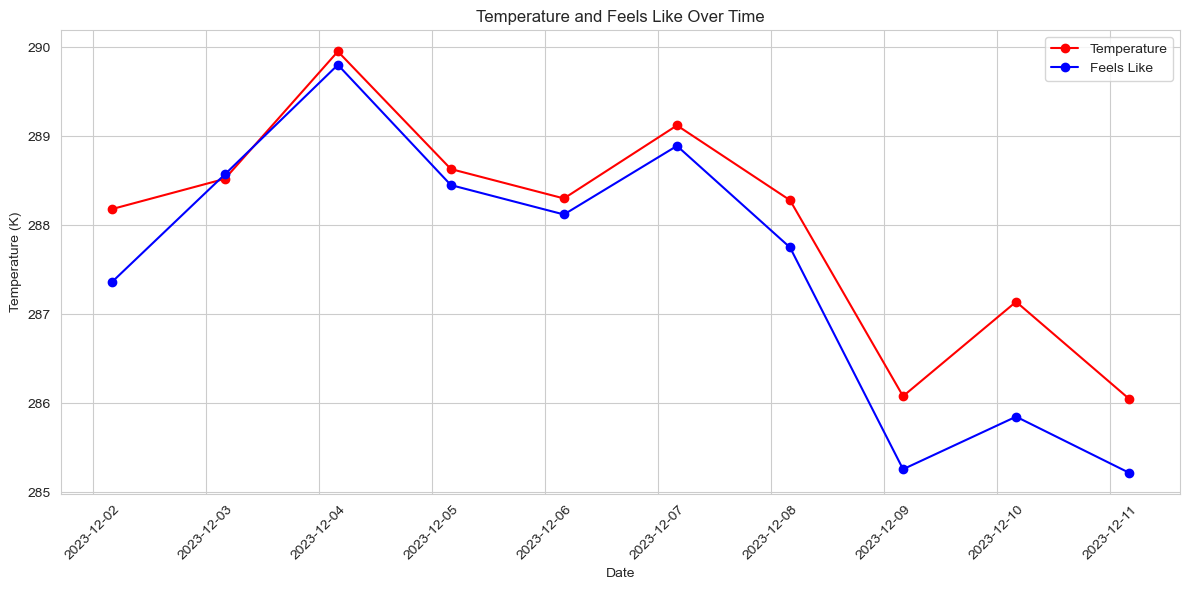

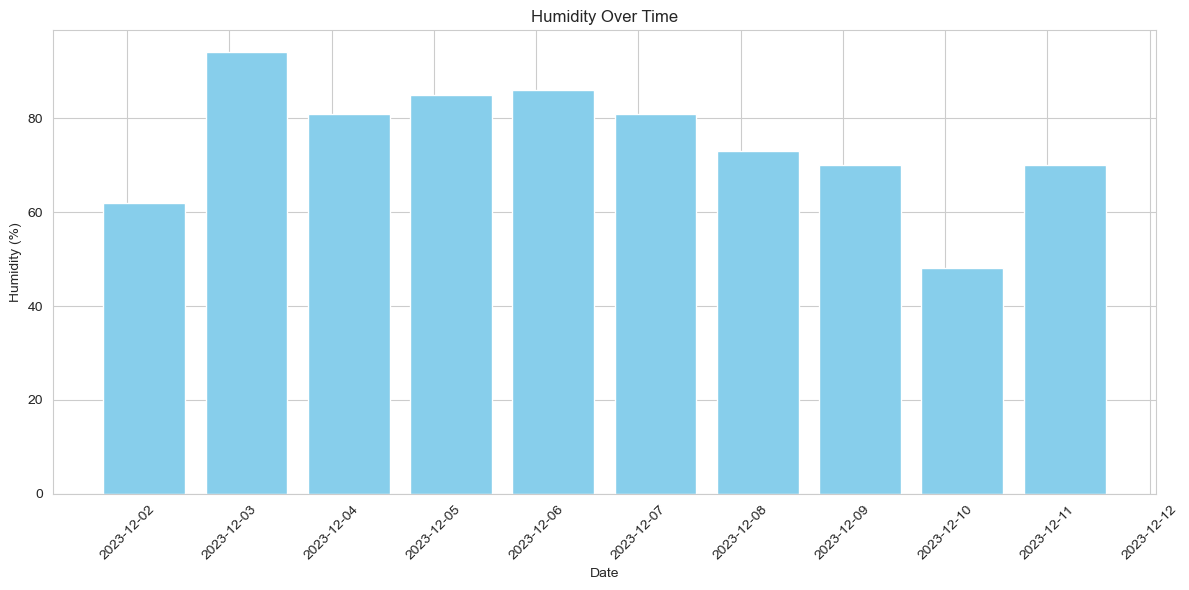

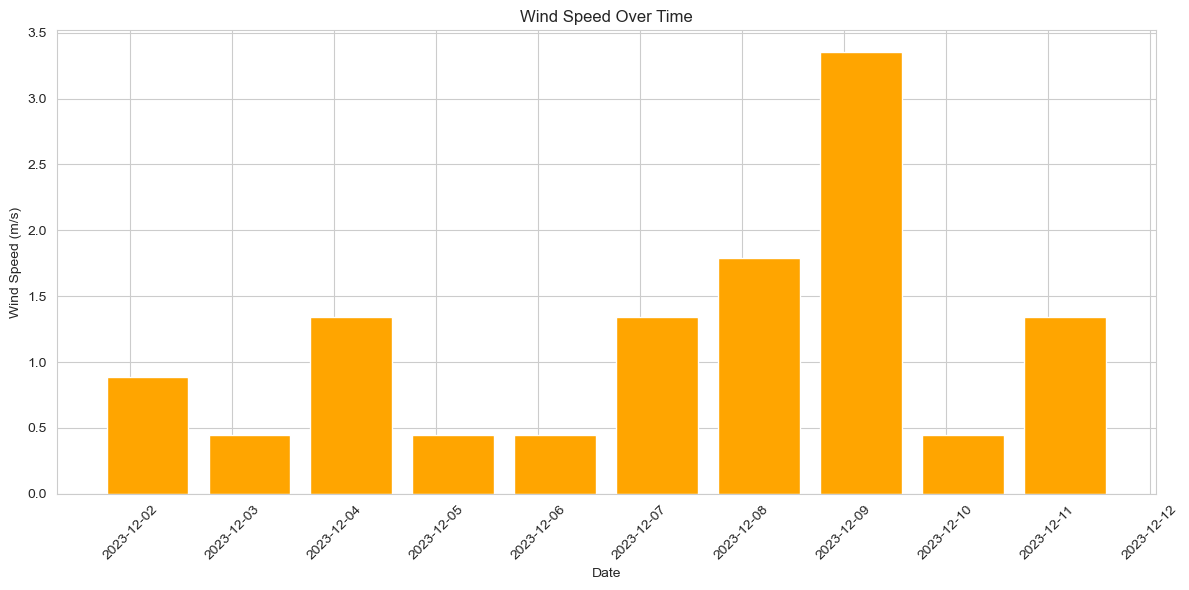

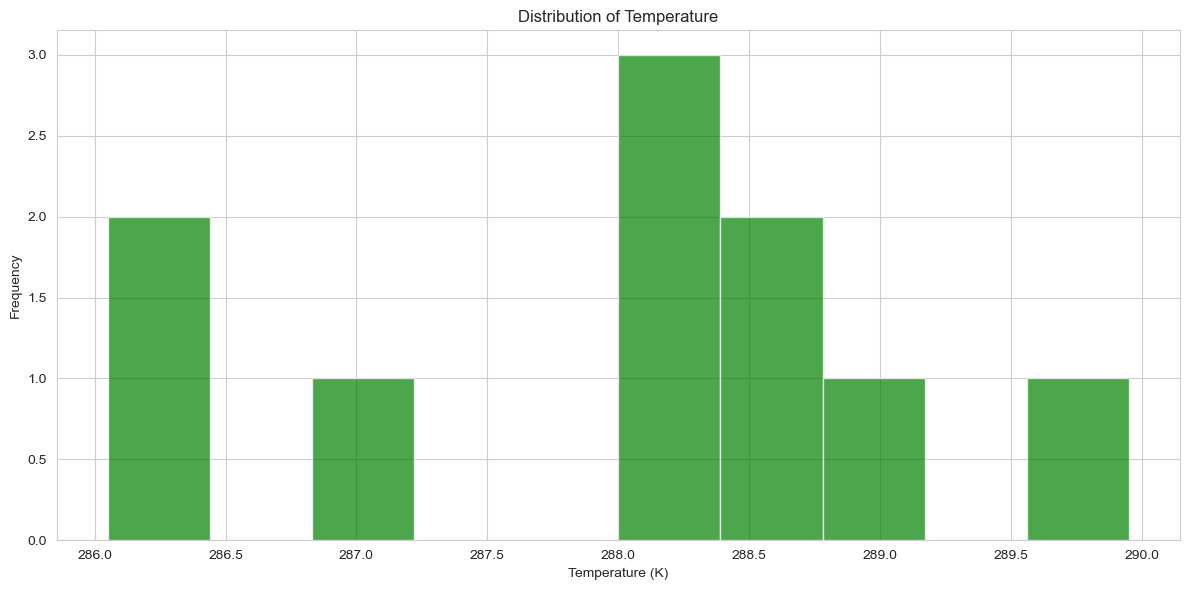

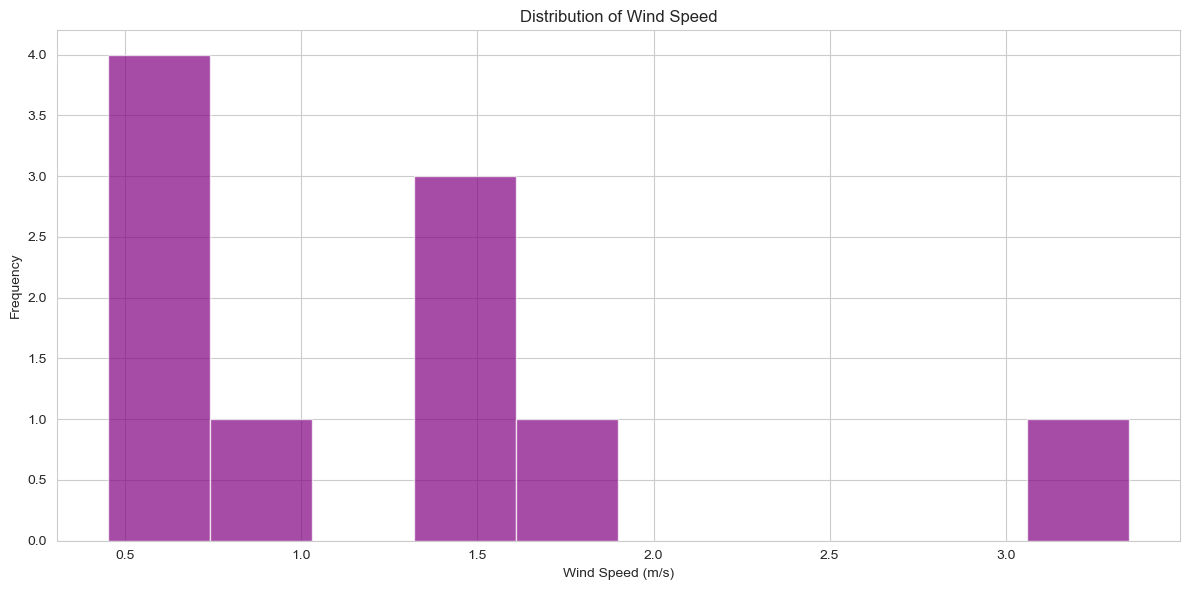

In [3]:
import requests
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to convert Unix timestamp to datetime
def timestamp_to_datetime(timestamp):
    try:
        # Convert the timestamp to UTC datetime format
        return datetime.datetime.utcfromtimestamp(timestamp)
    except Exception as e:
        print(f"Error in timestamp_to_datetime: {e}")
        return None

#get weather data from API (sparse, etc)
def get_weather_data(lat, lon, timestamp, api_key):
    url = f"https://api.openweathermap.org/data/3.0/onecall/timemachine?lat={lat}&lon={lon}&dt={timestamp}&appid={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception if the request is unsuccessful
        
        # Debugging: print the full response for checking
        print(f"Response for timestamp {timestamp}: {response.json()}")
        
        weather_data = response.json()
        
        # Check if 'data' is present in the response, else return None
        if 'data' not in weather_data:
            print("Error: 'data' not found in the response")
            return None
        
        # Access the first entry in the 'data' list
        current_data = weather_data['data'][0]
        
        # Extract relevant weather data from the response
        temp = current_data.get('temp')
        feels_like = current_data.get('feels_like')
        humidity = current_data.get('humidity')
        pressure = current_data.get('pressure')
        dew_point = current_data.get('dew_point')
        clouds = current_data.get('clouds')
        uvi = current_data.get('uvi', 'N/A')  # 'uvi' may not always be in the response
        visibility = current_data.get('visibility', 'N/A')  # Default value if visibility is missing
        wind_speed = current_data.get('wind_speed')
        wind_deg = current_data.get('wind_deg')
        weather_desc = current_data['weather'][0].get('description', 'N/A')
        
        # Convert the timestamp to readable datetime format
        current_time = timestamp_to_datetime(current_data['dt'])
        
        # Return a dictionary with the extracted weather data
        return {
            'timestamp': current_time,
            'temp': temp,
            'feels_like': feels_like,
            'humidity': humidity,
            'pressure': pressure,
            'dew_point': dew_point,
            'clouds': clouds,
            'uvi': uvi,
            'visibility': visibility,
            'wind_speed': wind_speed,
            'wind_deg': wind_deg,
            'weather_desc': weather_desc
        }
    except requests.exceptions.RequestException as e:
        print(f"Failed to retrieve weather data: {e}")
        return None
    except KeyError as e:
        print(f"Missing expected data in response: {e}")
        return None

# Function to fetch sunrise and sunset data from the Sunrise-Sunset API
def get_sunrise_sunset_data(lat, lon, date_obj):
    url = f"https://api.sunrise-sunset.org/json?lat={lat}&lng={lon}&date={date_obj.strftime('%Y-%m-%d')}&formatted=0"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception if the request is unsuccessful
        
        if response.status_code == 200:
            data = response.json()['results']
            # Convert sunrise and sunset time from ISO format to datetime
            sunrise = datetime.datetime.fromisoformat(data['sunrise'])
            sunset = datetime.datetime.fromisoformat(data['sunset'])
            # Calculate solar noon (midpoint between sunrise and sunset)
            solar_noon = sunrise + (sunset - sunrise) / 2
            # Return Unix timestamp for solar noon
            return int(solar_noon.timestamp())  
        else:
            print(f"Error fetching sunrise-sunset data: {response.status_code}")
            print(response.text)
            return None
    except requests.exceptions.RequestException as e:
        print(f"Failed to retrieve sunrise-sunset data: {e}")
        return None

# Main function to gather weather and solar data and analyze solar potential
def analyze_solar_potential(lat, lon, api_key, start_date, end_date):
    weather_data_list = []  # List to store weather data for each day
    
    # Convert start and end dates to datetime objects for easier manipulation
    start_date_obj = datetime.datetime.strptime(start_date, '%Y-%m-%d')
    end_date_obj = datetime.datetime.strptime(end_date, '%Y-%m-%d')
    
    # Iterate over the date range, one day at a time
    current_date_obj = start_date_obj
    while current_date_obj <= end_date_obj:
        print(f"\nAnalyzing solar potential for {current_date_obj.strftime('%Y-%m-%d')}:")
        
        # Fetch solar noon timestamp based on sunrise and sunset times
        solar_noon_timestamp = get_sunrise_sunset_data(lat, lon, current_date_obj)
        
        if solar_noon_timestamp:
            # Fetch weather data for solar noon based on Unix timestamp
            weather_data = get_weather_data(lat, lon, solar_noon_timestamp, api_key)
            if weather_data:
                # Add fetched weather data to the list
                weather_data_list.append(weather_data)
        
        # Move to the next day
        current_date_obj += datetime.timedelta(days=1)
    
    # Visualize data if any weather data was collected
    if weather_data_list:
        visualize_data(weather_data_list)

# Function to visualize weather data and display tables
def visualize_data(weather_data_list):
    # Extract individual weather data for each day
    timestamps = [data['timestamp'] for data in weather_data_list]
    temps = [data['temp'] for data in weather_data_list]
    feels_like = [data['feels_like'] for data in weather_data_list]
    humidity = [data['humidity'] for data in weather_data_list]
    pressure = [data['pressure'] for data in weather_data_list]
    dew_points = [data['dew_point'] for data in weather_data_list]
    clouds = [data['clouds'] for data in weather_data_list]
    uvi = [data['uvi'] for data in weather_data_list]
    visibility = [data['visibility'] for data in weather_data_list]
    wind_speeds = [data['wind_speed'] for data in weather_data_list]
    
    # Convert timestamps to datetime for better visualization
    timestamps = [datetime.datetime.utcfromtimestamp(ts.timestamp()) for ts in timestamps]
    
    # Create a DataFrame-like structure for easy visualization
    df = pd.DataFrame({
        'Date': timestamps,
        'Temperature (K)': temps,
        'Feels Like (K)': feels_like,
        'Humidity (%)': humidity,
        'Pressure (hPa)': pressure,
        'Dew Point (K)': dew_points,
        'Cloudiness (%)': clouds,
        'UV Index': uvi,
        'Visibility (m)': visibility,
        'Wind Speed (m/s)': wind_speeds
    })
    
    # Display table using Pandas Styler
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")  # Apply white grid style
    
    # improve readability
    df.style.apply(lambda x: ['background-color: lightblue' for _ in x], axis=1)
    # Apply bold formatting for certain columns like temperature and humidity
    df.style.applymap(lambda x: 'color: #333333; font-weight: bold;', subset=["Temperature (K)", "Feels Like (K)", "Humidity (%)"])  
    
    print(df)  # Print the dataframe
    
    # Plot Temperature and Feels Like over time
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Temperature (K)'], label='Temperature', color='red', marker='o')
    plt.plot(df['Date'], df['Feels Like (K)'], label='Feels Like', color='blue', marker='o')
    plt.title('Temperature and Feels Like Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (K)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot Humidity over time as a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(df['Date'], df['Humidity (%)'], color='skyblue')
    plt.title('Humidity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Humidity (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Plot Wind Speed over time as a bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(df['Date'], df['Wind Speed (m/s)'], color='orange')
    plt.title('Wind Speed Over Time')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (m/s)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Histogram of Temperature distribution
    plt.figure(figsize=(12, 6))
    plt.hist(df['Temperature (K)'], bins=10, color='green', alpha=0.7)
    plt.title('Distribution of Temperature')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Histogram of Wind Speed distribution
    plt.figure(figsize=(12, 6))
    plt.hist(df['Wind Speed (m/s)'], bins=10, color='purple', alpha=0.7)
    plt.title('Distribution of Wind Speed')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Set the latitude, longitude, and API key for weather data retrieval
latitude = 37.7749  # San Francisco latitude
longitude = -122.4194  # San Francisco longitude
api_key = "8e3b53e872fe407c17cd7093ebb5dabe"  # OpenWeatherMap API key
start_date = '2023-12-01'
end_date = '2023-12-10'

# Run the solar potential analysis and visualize results
analyze_solar_potential(latitude, longitude, api_key, start_date, end_date)